In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import *
import tensorflow as tf

In [102]:
data_train = pd.read_csv("/content/drive/MyDrive/house_price_dataset/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/house_price_dataset/test.csv")

In [103]:
data_train.fillna(0 , inplace=True)

data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [104]:
X = np.array(data_train[["YearBuilt" , "OverallQual" , "FullBath" , "TotalBsmtSF", "1stFlrSF", "GarageArea" , "MoSold" , "OverallQual"]].values)

y = np.array(data_train[["SalePrice"]].values)

In [105]:
X_train , X_val , Y_train , Y_val = train_test_split(X , y , train_size= 0.8 , shuffle=True)

In [106]:
X_train.shape , Y_train.shape , X_val.shape , Y_val.shape

((1168, 8), (1168, 1), (292, 8), (292, 1))

In [107]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9 , activation="sigmoid"),
    tf.keras.layers.Dense(200 , activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(150 , activation=tf.keras.layers.LeakyReLU()) ,
    tf.keras.layers.Dense(128 , activation="relu") ,
    tf.keras.layers.Dense(64 , activation="relu") ,
    tf.keras.layers.Dense(32 , activation="relu") ,
    tf.keras.layers.Dense(8 , activation="relu") ,
    tf.keras.layers.Dense(1 , activation="linear") # regression hast va y gheymate faghat 1 khoone hast - chon regression hast pas linear mizarim mamoolan

])

In [108]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001) , loss= tf.keras.losses.mean_absolute_error) # dar regression ACCURACY nadarim

In [109]:
model_output = model.fit(X_train , Y_train , epochs=100 )

Epoch 1/100
37/37 [==============================] - 3s 4ms/step - loss: 180381.6250
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 176758.5156
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 105911.7891
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 54392.2500
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 54051.9883
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 53942.0312
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 53833.2383
Epoch 8/100
37/37 [==============================] - 0s 4ms/step - loss: 54000.8242
Epoch 9/100
37/37 [==============================] - 0s 5ms/step - loss: 53628.3203
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 51831.2578
Epoch 11/100
37/37 [==============================] - 0s 4ms/step - loss: 50272.3398
Epoch 12/100
37/37 [==============================] - 0s 4ms/step - los

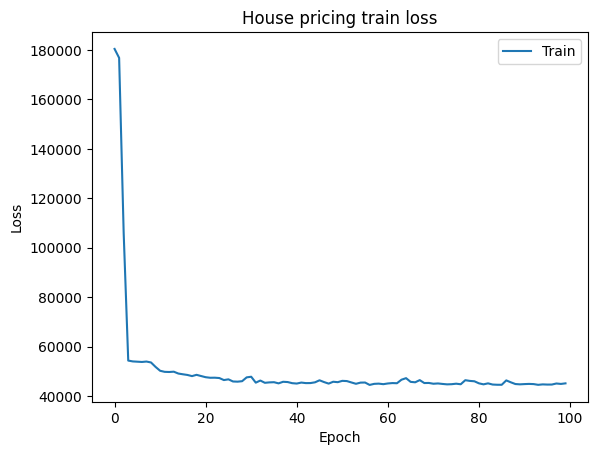

In [110]:
plt.plot(model_output.history["loss"], label='Train')
plt.title("House pricing train loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [111]:
model.evaluate(X_val , Y_val)

10/10 [==============================] - 0s 3ms/step - loss: 47080.7852


47080.78515625

In [ ]:
#my_house =np.array([[2016 , 12 , 0 , 1 , 135 , 0  ]])
#model.predict(my_house)


In [ ]:
#save model ===> save weights

In [114]:
model.save("/content/drive/MyDrive/my_model.h5")

In [116]:
model2 = tf.keras.models.load_model("/content/drive/MyDrive/my_model.h5")